In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Read the data

In [11]:
data = pd.read_csv('./TrainingData/housing.csv', header=None, delimiter="\s+")
data = data.values
X = data[:, :13]
Y = data[:,13]
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


### Normalization

In [12]:
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
print(u.shape, std.shape)
X = (X-u)/ std

(13,) (13,)


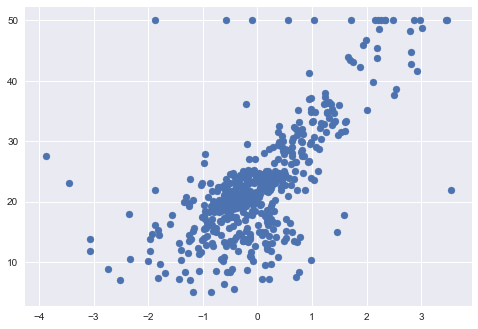

In [13]:
plt.style.use('seaborn')
plt.scatter(X[:,5],Y)

### Add X0 to X

In [14]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(506, 14)


In [15]:
print(X)

[[ 1.         -0.41978194  0.28482986 ... -1.45900038  0.44105193
  -1.0755623 ]
 [ 1.         -0.41733926 -0.48772236 ... -0.30309415  0.44105193
  -0.49243937]
 [ 1.         -0.41734159 -0.48772236 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [ 1.         -0.41344658 -0.48772236 ...  1.17646583  0.44105193
  -0.98304761]
 [ 1.         -0.40776407 -0.48772236 ...  1.17646583  0.4032249
  -0.86530163]
 [ 1.         -0.41500016 -0.48772236 ...  1.17646583  0.44105193
  -0.66905833]]


In [19]:
def hypothesis(x,theta) :
    n = x.shape[0]
    y_ = 0
    
    for i in range(n) :
        y_ += theta[i] * x[i]
        
    return y_
        
def error(X,Y,theta) :
    
    e = 0.0
    m = X.shape[0]
    
    for i in range(m) :
        y = Y[i]
        y_ = hypothesis(X[i],theta)
        
        e += (y - y_) ** 2
        
    return e / m

def gradient(X,Y,theta) :
    
    m,n = X.shape
    grad = np.zeros((n,))
    
    for j in range(n) :
        
        res = 0.0
        for i in range(m) :
            
            y = Y[i]
            y_ = hypothesis(X[i],theta)
            
            res += (y_ - y)*X[i][j]
            
        grad[j] = res
        
    return grad/m

def gradient_descent(X,Y,lr=0.1,max_epoch=300) :
    
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epoch) :
        
        e = error(X,Y,theta)
        error_list.append(e)
        
        grad = gradient(X,Y,theta) 
        
        for j in range(n) :
            theta[j] = theta[j] - lr * grad[j]
    
    
    
    return theta, error_list

### Obtain theta 

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


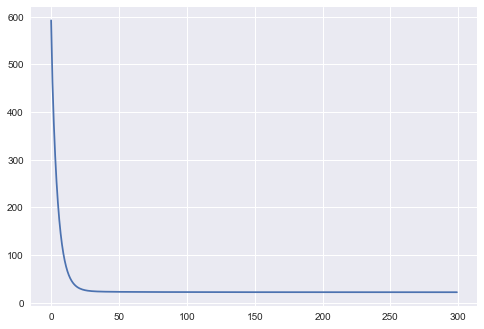

In [21]:
theta,error_list = gradient_descent(X,Y)
print(theta)
plt.plot(error_list)

### Prediction

In [22]:
y_pred_list = []

m = X.shape[0]

for i in range(m) :
    pred = hypothesis(X[i],theta)
    y_pred_list.append(pred)
    
y_pred_list = np.array(y_pred_list)

### R2 Score

In [23]:
def r2_score(Y, Y_) :
    num = np.sum((Y - Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    score = 1 - num/denom
    
    return score * 100

In [24]:
r2_score(Y,y_pred_list)

74.04541323942743